<a href="https://colab.research.google.com/github/sr4rish/NLP_Tutorials/blob/master/NLP__Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Sample code to remove noisy words from a text

noise_list = ["is", "a", "this", "..."] 
def _remove_noise(input_text):
    words = input_text.split() 
    noise_free_words = [word for word in words if word not in noise_list] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

_remove_noise("this is a sample text")

'sample text'

In [ ]:
# Sample code to remove a regex pattern 
import re 

def _remove_regex(input_text, regex_pattern):
    urls = re.finditer(regex_pattern, input_text) 
    for i in urls: 
        input_text = re.sub(i.group().strip(), '', input_text)
    return input_text

regex_pattern = "#[\w]*" 
#[#]\w+ 

_remove_regex("remove this #hashtag from this text", regex_pattern)

'remove this  from this text'

2.2 Lexicon Normalization
Another type of textual noise is about the multiple representations exhibited by single word.

For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”, Though they mean different but contextually all are similar. The step converts all the disparities of a word into their normalized form (also known as lemma). Normalization is a pivotal step for feature engineering with text as it converts the high dimensional features (N different features) to the low dimensional space (1 feature), which is an ideal ask for any ML model.

The most common lexicon normalization practices are :

Stemming:  Stemming is a rudimentary rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.
Lemmatization: Lemmatization, on the other hand, is an organized & step by step procedure of obtaining the root form of the word, it makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations).
Below is the sample code that performs lemmatization and stemming using python’s popular library – NLTK.

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()

word = "multiplying" 
print(lem.lemmatize(word, "v"))

stem.stem(word)

multiply


'multipli'

Object Standardization
Text data often contains words or phrases which are not present in any standard lexical dictionaries. These pieces are not recognized by search engines and models.

Some of the examples are – acronyms, hashtags with attached words, and colloquial slangs. With the help of regular expressions and manually prepared data dictionaries, this type of noise can be fixed, the code below uses a dictionary lookup method to replace social media slangs from a text.

In [ ]:
lookup_dict = {'rt':'Retweet', 'dm':'direct message', "awsm" : "awesome", "luv" :"love"}
def _lookup_words(input_text):
    words = input_text.split() 
    new_words = [] 
    for word in words:
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
        new_words.append(word) 
        new_text = " ".join(new_words) 
    return new_text

_lookup_words("RT this is a retweeted tweet by Sourav Rishishwar")

'Retweet this is a retweeted tweet by Sourav Rishishwar'

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

corpus = []
for i in range(len(dataset.Review)):
    review = re.sub('[^a-zA-Z]', ' ', dataset.Review[i])
    review = review.split()
    review = [ps.stem(words) for words in review if not words in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

B. **Topic Modeling**
Topic modeling is a process of automatically identifying the topics present in a text corpus, it derives the hidden patterns among the words in the corpus in an unsupervised manner. Topics are defined as “a repeating pattern of co-occurring terms in a corpus”. A good topic model results in – “health”, “doctor”, “patient”, “hospital” for a topic – Healthcare, and “farm”, “crops”, “wheat” for a topic – “Farming”.

Latent Dirichlet Allocation (LDA) is the most popular topic modelling technique, Following is the code to implement topic modeling using LDA in python. For a detailed explanation about its working and implementation, check the complete article here.

In [ ]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father." 
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc_complete = [doc1, doc2, doc3]
doc_clean = [doc.split() for doc in doc_complete]
doc_clean[0]

['Sugar',
 'is',
 'bad',
 'to',
 'consume.',
 'My',
 'sister',
 'likes',
 'to',
 'have',
 'sugar,',
 'but',
 'not',
 'my',
 'father.']

In [ ]:
import gensim
from gensim import corpora

# Creating the term dictionary of our corpus, where every unique term is assigned an index.  
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above. 
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

# Results 
print(ldamodel.print_topics())

[(0, '0.089*"to" + 0.051*"sister" + 0.051*"My" + 0.051*"my" + 0.051*"is" + 0.051*"sugar," + 0.051*"not" + 0.051*"Sugar" + 0.051*"bad" + 0.051*"consume."'), (1, '0.064*"driving" + 0.037*"a" + 0.037*"dance" + 0.037*"time" + 0.037*"spends" + 0.037*"practice." + 0.037*"of" + 0.037*"lot" + 0.037*"father" + 0.037*"around"'), (2, '0.029*"sister" + 0.029*"My" + 0.029*"my" + 0.029*"to" + 0.029*"Doctors" + 0.029*"may" + 0.029*"pressure." + 0.029*"stress" + 0.029*"increased" + 0.029*"suggest"')]


**N-Grams as Features**
A combination of N words together are called N-Grams. N grams (N > 1) are generally more informative as compared to words (Unigrams) as features. Also, bigrams (N = 2) are considered as the most important features of all the others. The following code generates bigram of a text.

In [ ]:
def generate_ngrams(text, n):
    words = text.split()
    output = []  
    for i in range(len(words)-n+1):
        output.append(words[i:i+n])
    return output

generate_ngrams('this is a sample text', 2)

[['this', 'is'], ['is', 'a'], ['a', 'sample'], ['sample', 'text']]

**Statistical Features**

Text data can also be quantified directly into numbers using several techniques described in this section:

A.  Term Frequency – Inverse Document Frequency (TF – IDF)
TF-IDF is a weighted model commonly used for information retrieval problems. It aims to convert the text documents into vector models on the basis of occurrence of words in the documents without taking considering the exact ordering. For Example – let say there is a dataset of N text documents, In any document “D”, TF and IDF will be defined as –

Term Frequency (TF) – TF for a term “t” is defined as the count of a term “t” in a document “D”

Inverse Document Frequency (IDF) – IDF for a term is defined as logarithm of ratio of total documents available in the corpus and number of documents containing the term T.

TF . IDF – TF IDF formula gives the relative importance of a term in a corpus (list of documents), given by the following formula below. Following is the code using python’s scikit learn package to convert a text into tf idf vectors:


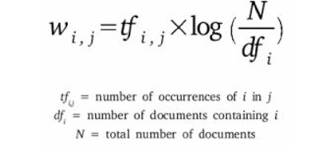

The model creates a vocabulary dictionary and assigns an index to each word. Each row in the output contains a tuple (i,j) and a tf-idf value of word at index j in document i.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
obj = TfidfVectorizer()
corpus = ['This is sample document.', 'another random document.', 'third sample document text']
X = obj.fit_transform(corpus)
print(X)

  (0, 1)	0.34520501686496574
  (0, 4)	0.444514311537431
  (0, 2)	0.5844829010200651
  (0, 7)	0.5844829010200651
  (1, 3)	0.652490884512534
  (1, 0)	0.652490884512534
  (1, 1)	0.3853716274664007
  (2, 5)	0.5844829010200651
  (2, 6)	0.5844829010200651
  (2, 1)	0.34520501686496574
  (2, 4)	0.444514311537431


# **WORD2VEC**

In [ ]:
import gensim

sentence=[['Neeraj','Boy'],['Sarwan','is'],['good','man'],['woman', 'girl']]

#training word2vec on 3 sentences
model = gensim.models.Word2Vec(sentence, min_count=1,size=300,workers=4)

In [ ]:
#using the model
#The new trained model can be used similar to the pre-trained ones.

#printing similarity index
print(model.similarity('woman', 'man'))

0.030551596


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
